In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import os
from glob import glob
import configparser

In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.gridspec import GridSpec

In [4]:
plt.style.use('../figures.mplstyle')

In [5]:
galname = "NGC4030"

In [6]:
fig_out = f"paper-plots/{galname}/"
if not os.path.exists(fig_out):
    os.mkdir(fig_out)

In [8]:
configdir = f"../data/{galname}/config/"

configfils = glob(os.path.join(configdir,"*.ini"))
config_fil = configfils[0]
if len(configfils) > 1:
    for fil in configfils:
        if 'cleaned' in fil:
            config_fil = fil

    
config = configparser.ConfigParser()
parsing = True
while parsing:
    try:
        config.read(config_fil)
        parsing = False
    except configparser.Error as e:
        print(f"Error parsing file: {e}")
        print(f"Cleaning {config_fil}")
        clean_ini_file(config_fil, overwrite=True)


redshift = float(config['default']['z'])
print(f"Redshift z={redshift} found in {config_fil}.")




cubedir = f"../data/{galname}/cube/{galname}-SQUARE0.6/BETA-CORR/"
fitsfils = glob(os.path.join(cubedir,"**","*.fits"),recursive=True)

for fil in fitsfils:
    if "LOGCUBE" in fil:
        cubefil = fil
        print(f"Cube file found: {cubefil}")
    if "MAPS" in fil:
        mapfil = fil
        print(f"Map file found: {mapfil}")

cube = fits.open(cubefil)
Map = fits.open(mapfil)

Redshift z=0.00489 found in ../data/NGC4030/config/mangadap-1-1-LINCUBE-NGC4030.ini.
Map file found: ../data/NGC4030/cube/NGC4030-SQUARE0.6/BETA-CORR/SQUARE0.6-MILESHC-MASTARHC2-NOISM/1/1/manga-1-1-MAPS-SQUARE0.6-MILESHC-MASTARHC2-NOISM.fits
Cube file found: ../data/NGC4030/cube/NGC4030-SQUARE0.6/BETA-CORR/SQUARE0.6-MILESHC-MASTARHC2-NOISM/1/1/manga-1-1-LOGCUBE-SQUARE0.6-MILESHC-MASTARHC2-NOISM.fits


# Whitelight Image

In [9]:
flux = cube['FLUX'].data

In [10]:
whitelight = np.median(flux,axis=0)

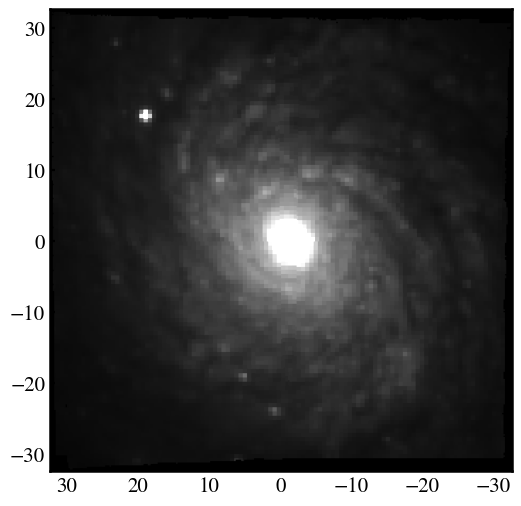

In [11]:
extent = [32.4, -32.6,-32.4, 32.6]

plt.imshow(whitelight,origin='lower',cmap='gray',vmin=0,vmax=np.median(whitelight)+5*np.std(whitelight),
          extent=extent)
#plt.axis('off')
plt.savefig(f"{fig_out}-whitelight.png",bbox_inches='tight',dpi=300)
plt.show()

# Na D ISM EW

In [12]:
binid = cube['BINID'].data[0]
stellar_vel = Map['STELLAR_VEL'].data
waves = cube['WAVE'].data
model = cube['MODEL'].data
ivar = cube['IVAR'].data

In [13]:
inds = np.where(binid == 1000)

In [14]:
flux1d = np.median(flux[:,inds[0],inds[1]], axis=1)
ivar1d = np.median(ivar[:,inds[0],inds[1]], axis=1)
model1d = np.median(model[:,inds[0],inds[1]], axis=1)

sv = np.median(stellar_vel[inds[0],inds[1]])
c = 2.998e5
z = ((sv * (1+redshift))/c + redshift)
restwav = waves / (1+z)

In [15]:
sigma1d = 1 / np.sqrt(ivar1d)

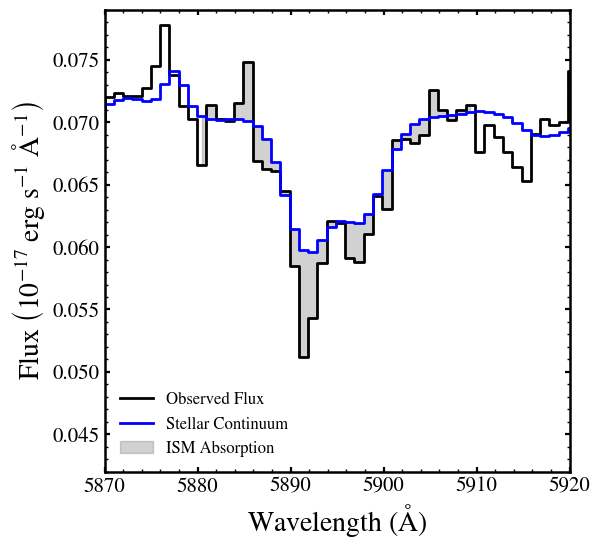

In [18]:
plt.plot(restwav,flux1d,color='k',drawstyle='steps-mid',label="Observed Flux")
plt.plot(restwav,model1d,color='blue',drawstyle='steps-mid',label="Stellar Continuum")
plt.plot(restwav,sigma1d,color='dimgray')

window = (restwav >= 5880) & (restwav <= 5910)

plt.fill_between(restwav,model1d,flux1d, window, color='dimgray', alpha=0.3, step="mid", label='ISM Absorption')

plt.xlim(5870,5920)
plt.ylim(0.042,.079)
plt.legend(frameon=False, fontsize='large')

plt.xlabel(r"Wavelength $\left( \mathrm{\AA} \right)$")
plt.ylabel(r"Flux $\left( \mathrm{10^{-17}\ erg\ s^{-1}\ \AA ^{-1}} \right)$")
#plt.ylabel("Normalized Flux")
plt.savefig(f"{fig_out}-NaD_window.png",bbox_inches='tight',dpi=300)
plt.show()

# Dap Maps

In [19]:
configdir = f"../data/{galname}/config/"

configfils = glob(os.path.join(configdir,"*.ini"))
config_fil = configfils[0]
if len(configfils) > 1:
    for fil in configfils:
        if 'cleaned' in fil:
            config_fil = fil

    
config = configparser.ConfigParser()
parsing = True
while parsing:
    try:
        config.read(config_fil)
        parsing = False
    except configparser.Error as e:
        print(f"Error parsing file: {e}")
        print(f"Cleaning {config_fil}")
        clean_ini_file(config_fil, overwrite=True)


redshift = float(config['default']['z'])
print(f"Redshift z={redshift} found in {config_fil}.")




cubedir = f"../data/{galname}/cube/{galname}-SQUARE0.6/BETA-CORR/"
fitsfils = glob(os.path.join(cubedir,"**","*.fits"),recursive=True)

for fil in fitsfils:
    if "LOGCUBE" in fil:
        cubefil = fil
        print(f"Cube file found: {cubefil}")
    if "MAPS" in fil:
        mapfil = fil
        print(f"Map file found: {mapfil}")

cube = fits.open(cubefil)
Map = fits.open(mapfil)

Redshift z=0.00489 found in ../data/NGC4030/config/mangadap-1-1-LINCUBE-NGC4030.ini.
Map file found: ../data/NGC4030/cube/NGC4030-SQUARE0.6/BETA-CORR/SQUARE0.6-MILESHC-MASTARHC2-NOISM/1/1/manga-1-1-MAPS-SQUARE0.6-MILESHC-MASTARHC2-NOISM.fits
Cube file found: ../data/NGC4030/cube/NGC4030-SQUARE0.6/BETA-CORR/SQUARE0.6-MILESHC-MASTARHC2-NOISM/1/1/manga-1-1-LOGCUBE-SQUARE0.6-MILESHC-MASTARHC2-NOISM.fits


In [20]:
flux = cube['FLUX'].data
stellar_vel = Map['STELLAR_VEL'].data
stellar_vel_mask = Map['STELLAR_VEL_MASK'].data
stellar_sigma = Map['STELLAR_SIGMA'].data
stellar_sigma_mask = Map['STELLAR_SIGMA_MASK'].data
ivar = cube['IVAR'].data
SNR = Map['SPX_SNR'].data
ha = Map['EMLINE_GFLUX'].data[23]
ha_mask = Map['EMLINE_GFLUX_MASK'].data[23]




extent = [32.4, -32.6,-32.4, 32.6]

# whitelight
whitelight = np.median(flux,axis=0)
# stellar velocity
w = (stellar_vel >= np.median(stellar_vel) - 4 * np.std(stellar_vel)) & (stellar_vel <= np.median(stellar_vel) + 4*np.std(stellar_vel))
stellar_vel[~w] = np.nan
w = stellar_vel_mask != 0
stellar_vel[w] = np.nan
# stellar sigma
w = (stellar_sigma >= np.median(stellar_sigma) - 4 * np.std(stellar_sigma)) & (stellar_sigma <= np.median(stellar_sigma) + 4*np.std(stellar_sigma))
stellar_sigma[~w] = np.nan
stellar_sigma[stellar_sigma==0] = np.nan
w = stellar_sigma_mask != 0
stellar_sigma[w] = np.nan
# H alpha
ha[ha==0] = np.nan
w = ha_mask != 0
ha[w] = np.nan


datalist = [whitelight, stellar_vel, stellar_sigma, SNR, ha]
cmaplist = ['gray','seismic', 'inferno_r', 'rainbow', 'rainbow']
vmin = [0, -250, 30, 0, 0.01]
vmax = [1, 250, 119, 60, 10]
unitslist = [None, r"$\mathrm{km\ s^{-1}}$", r"$\mathrm{km\ s^{-1}}$", "", r"$\mathrm{10^{-17}\ erg\ s^{-1}\ cm^{-2}\ spaxel}$"]

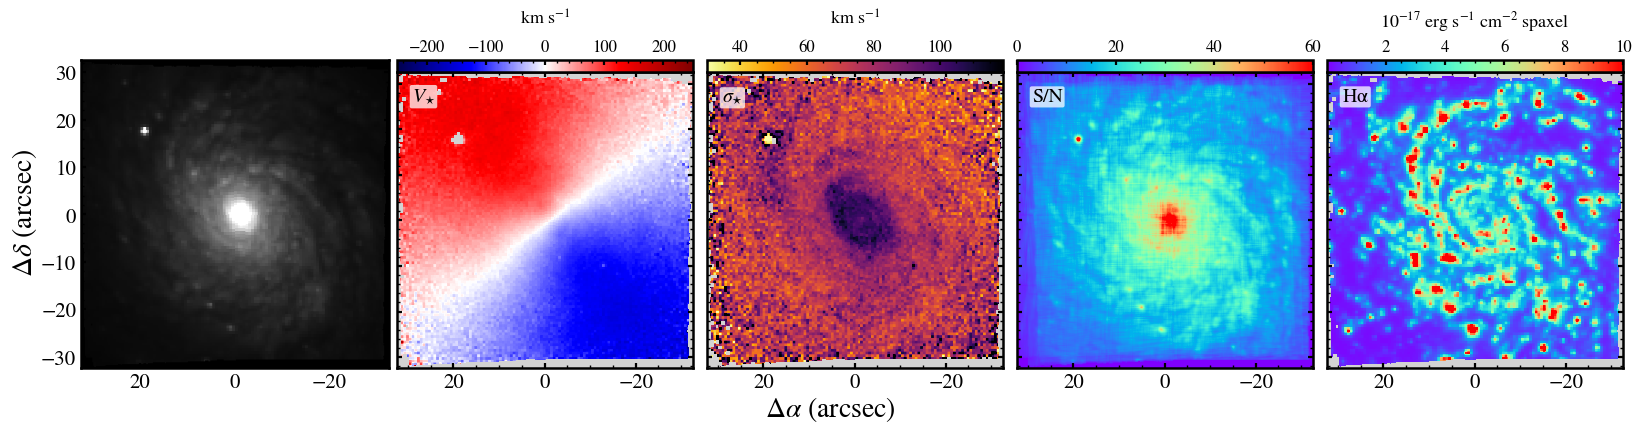

In [21]:
fig, ax = plt.subplots(1,5,sharey=True,figsize=(20,4))

#fig = plt.figure(figsize=(15,3))
#gs = GridSpec(2,5, height_ratios=[0.05, 1], hspace=0.3)
#ax = [fig.add_subplot(gs[1, i] for i in range(5))]

#im0 = ax[0].imshow(whitelight, cmap='gray', vmin=0, vmax=1, origin='lower')
for i in range(5):
    data = datalist[i]
    cmap = cmaplist[i]
    label = unitslist[i]

    im = ax[i].imshow(data, origin='lower', cmap=cmap, extent=extent, vmin=vmin[i], vmax=vmax[i])
    ax[i].set_facecolor('lightgray')
    if i>0:
        divider = make_axes_locatable(ax[i])
        cax = divider.append_axes("top", size="4%", pad=0)
        cbar = fig.colorbar(im, cax=cax, orientation='horizontal')
        cbar.ax.tick_params(labelsize=12)
        cbar.set_label(label,fontsize=13,labelpad=-45)
        cax.xaxis.set_ticks_position('top')

    #ax[i].set_aspect(1)

#pos1 = ax[1].get_position()
#ax[0].set_position(ax[1].get_position())
ax[0].set_aspect(1)
fig.text(0.05, 0.9, r"$V_{\star}$", 
         transform=ax[1].transAxes, fontsize="x-large",
        bbox=dict(facecolor="white", alpha=0.75, edgecolor='none', boxstyle='round,pad=0.1'))
fig.text(0.05, 0.9, r"$\sigma_{\star}$", 
         transform=ax[2].transAxes, fontsize="x-large",
        bbox=dict(facecolor="white", alpha=0.75, edgecolor='none', boxstyle='round,pad=0.1'))
fig.text(0.05, 0.9, "S/N", transform=ax[3].transAxes, fontsize='x-large',
        bbox=dict(facecolor="white", alpha=0.75, edgecolor='none', boxstyle='round,pad=0.1'))
fig.text(0.05, 0.9, r"$\mathrm{H \alpha}$", transform=ax[4].transAxes, fontsize='x-large',
        bbox=dict(facecolor="white", alpha=0.75, edgecolor='none', boxstyle='round,pad=0.1'))


fig.text(0.09,0.5,r"$\Delta \delta$ (arcsec)", va="center", rotation='vertical',fontsize=20)
fig.text(0.5,-0.01,r"$\Delta \alpha$ (arcsec)", ha="center",fontsize=20)

#plt.subplots_adjust(left=0.05,right=0.95,top=0.85,bottom=0.15,wspace=.1)
fig.subplots_adjust(wspace=0)
plt.savefig(f"{fig_out}-DAPmaps.png", bbox_inches='tight',dpi=500)

# galaxy population

In [24]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.io as pio

In [25]:
from astropy.io import ascii

In [26]:
sdssfil = "dat/galSpecExtra-dr8.fits"
madfil = "dat/MAD_sample.dat"

mpajhu = fits.open(sdssfil)[1].data
sdssind = (mpajhu['LGM_TOT_P50'] > 5.0) & (mpajhu['SFR_TOT_P50'] > -10.0)

In [27]:
mad = ascii.read(madfil)
madlogMstar = mad['col6']
madlogSFR = np.log10(mad['col7'])

In [28]:
outfil = "paper-plots/fig_sfrM_MAD.pdf"

In [30]:
trace1 = go.Histogram2dContour(
    x=mpajhu['LGM_TOT_P50'][sdssind], y=mpajhu['SFR_TOT_P50'][sdssind], name='SDSS (Brinchmann et al. 2004)', ncontours=30,
    colorscale='BuPu', reversescale=False, showscale=False
    )

trace3 = go.Scatter(
    x=madlogMstar, y=madlogSFR, mode='markers', name='MUSE Atlas of Disks',
    marker=dict(size=8, color='red', symbol='triangle-down'))

data = [trace1, trace3]

layout = go.Layout(showlegend=True, autosize=False, width=600, height=550,
                    legend=dict(x=0,y=1,font=dict(size=18, color='black', family='Times New Roman')),
                    annotations=[dict(x=0.5, y=-0.15, showarrow=False, text=r'$\log M_{*}/M_{\odot}$', xref='paper', yref='paper',
                                          font=dict(size=40, color='black')),
                                     dict(x=-0.18, y=0.5, showarrow=False, text=r'$\log \mathrm{SFR}/[M_{\odot}\mathrm{yr}^{-1}]$)',
                                              xref='paper', yref='paper', textangle=-90, 
                                              font=dict(size=40, color='black'))],
                   xaxis=dict(range=[8.4,12], domain=[0,1.0],
                              showgrid=True, zeroline=True, showline=True, linewidth=2, mirror='ticks', 
                              #titlefont=dict(color='black', size=20, family='Times New Roman'),
                              tickfont=dict(color='black', size=20, family='Times New Roman')),
                   yaxis=dict(range=[-2.1,1.5], domain=[0,1.0],
                              showgrid=True, zeroline=True, showline=True, linewidth=2, mirror='ticks',
                              #titlefont=dict(color='black', size=20, family='Times New Roman'),
                              tickfont=dict(color='black', size=20, family='Times New Roman')))


fig = go.Figure(data=data, layout=layout)

pio.write_image(fig, outfil)  